## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks

*(weight ~15%)*



### Task 1.1 Revisit Fashion-MNIST classification with DNN

*(weight ~1%)*



---
**Assignment 1 model | Import and Data Load**

---

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)


fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(np.min(test_images))
print(np.max(test_images))
print(train_images.shape)
print(test_images.shape)

2.4.1
2.4.0
0
255
(60000, 28, 28)
(10000, 28, 28)


---
**Assignment 1 model | Preprocessing**

---

In [ ]:
# Max value in the image set:
max = np.max(train_images)

# Convert images from shape of 28*28 to 784 pixel (from a square 28x28 to a single row of 784x1)
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

#Normalization:
train_images = train_images.astype('float32')/max
test_images = test_images.astype('float32')/max

#Labels to cathegorical
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

---
**Assignment 1 model | Validation Split**

---

In [ ]:
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, train_size=0.75, random_state=101) # 0.25 x 0.8 = 0.2

---
**Assignment 1 model | Training**

---

The batch size = 128 and number of epoches = 50 will be used in all future experiment for better comparison of the models.


Epoch 1/50
352/352 [==============================] - 3s 5ms/step - loss: 0.8533 - accuracy: 0.7283 - val_loss: 0.5143 - val_accuracy: 0.8176
Epoch 2/50
352/352 [==============================] - 1s 4ms/step - loss: 0.5172 - accuracy: 0.8209 - val_loss: 0.3837 - val_accuracy: 0.8621
Epoch 3/50
352/352 [==============================] - 1s 4ms/step - loss: 0.4501 - accuracy: 0.8402 - val_loss: 0.3844 - val_accuracy: 0.8631
Epoch 4/50
352/352 [==============================] - 1s 4ms/step - loss: 0.4105 - accuracy: 0.8508 - val_loss: 0.3571 - val_accuracy: 0.8735
Epoch 5/50
352/352 [==============================] - 1s 4ms/step - loss: 0.3906 - accuracy: 0.8592 - val_loss: 0.3599 - val_accuracy: 0.8709
Epoch 6/50
352/352 [==============================] - 1s 4ms/step - loss: 0.3796 - accuracy: 0.8630 - val_loss: 0.3392 - val_accuracy: 0.8800
Epoch 7/50
352/352 [==============================] - 1s 4ms/step - loss: 0.3631 - accuracy: 0.8702 - val_loss: 0.3418 - val_accuracy: 0.8799
Epoch 

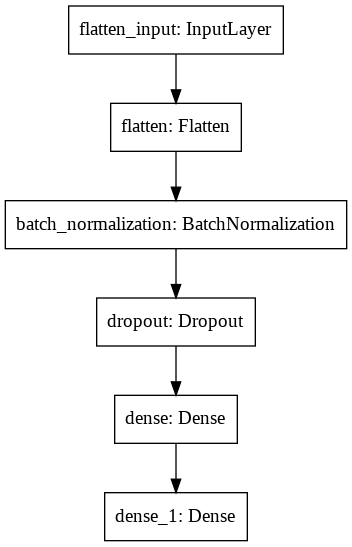

In [ ]:
# model:
model = tf.keras.Sequential([                       
    tf.keras.layers.Flatten(input_shape=(28 * 28, )), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),       
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),  
    tf.keras.layers.Dense(10, activation='softmax')     
])                                                     


# compile:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# save the initial weights for later experiments
init_weights = model.get_weights()

# fit
history = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_data=(val_images, val_labels))


# test accuracy/loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')


# model structure
from tensorflow.keras.utils import plot_model
plot_model(model)

Fashion Mnist Results (Task 1)

|   | Train Accuracy  | Train Loss  | Val Accuracy  | Val Loss   |  Test Accuracy | Test Loss |
|---|---|---|---|---|---|---|
| Original | 0.9034  | 0.2743  |  0.8899 |  0.3409 |  0.8856 |  0.3733 |

---

The fitting process again shows the good result with small losses, validation accuracy less than training accuracy and test accuracy of 0.88.

The plot for train/test accuracy loss also shows acceptable fit.

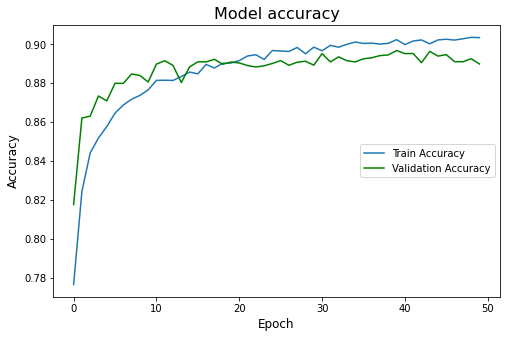

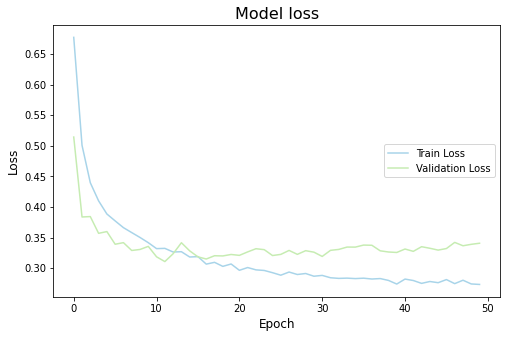

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy values
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('Model accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='right')
plt.show()

# Plot training loss values
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], color='#A8D4E9', label='Train Loss')
plt.plot(history.history['val_loss'], color='#C6ECB2', label='Validation Loss')
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='right')
plt.show()

### Task 1.2 Train a ConvNet from scratch

*(weight ~5%)*





---
**ConvNet | Import libraries**

---

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


---
**ConvNet | Load data, Train/Test split**

---

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

---
**ConvNet | Normalization, reshaping, labels to cathegorical**

---

In [ ]:
# max value in the image set:
max = np.max(train_images)

# normalize the data
train_images = train_images/max
test_images = test_images/max
print("train_images shape: ",train_images.shape)
print("test_images shape: ",test_images.shape)

# convert to the shape suitable for ConvNet model
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)
print("train_images shape: ",train_images.shape)
print("test_images shape: ",test_images.shape)

# import
from keras.utils.np_utils import to_categorical 

# convert to cathegorical
train_labels = to_categorical(train_labels, num_classes = 10)
# convert to cathegorical
test_labels = to_categorical(test_labels, num_classes = 10)

print(train_labels.shape)
print(test_labels.shape)

train_images shape:  (60000, 28, 28)
test_images shape:  (10000, 28, 28)
train_images shape:  (60000, 28, 28, 1)
test_images shape:  (10000, 28, 28, 1)
(60000, 10)
(10000, 10)


---
**ConvNet | Train/Validation split**

---

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state = 2)
print("train_images shape: ",train_images.shape)
print("val_images shape: ",val_images.shape)
print("train_labels shape: ",train_labels.shape)
print("val_labels shape :",val_labels.shape)

train_images shape:  (54000, 28, 28, 1)
val_images shape:  (6000, 28, 28, 1)
train_labels shape:  (54000, 10)
val_labels shape : (6000, 10)


---
**ConvNet | Import layers**

---

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix

from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

---
**ConvNet | Construct layers**

---

The ConvNet model with 871,530 trainable parameters. The input shape is (None, 28, 28, 1). 

It consists of 5 Batch Normalization layers,  3 Dense layers, 3 conv2d. 

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Models summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)       

---
**ConvNet | Model Compilation**

---

The optimizer is used Adam again (it showed better performance for fashion mnist in the previous experiments. TIt also helps to compare the quality of different models when they have the same parameter.

In [ ]:
# Compile the model
model.compile(optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              loss = "categorical_crossentropy", metrics=["accuracy"])

---
**ConvNet | Fit the ConvNet model**

---

For current experiemnt the verbose equals 2.

In [ ]:
# save the initial weights for later experiments
init_weights = model.get_weights()

epochs=50
batch_size=128

history = model.fit(train_images, train_labels, batch_size=batch_size,
                              shuffle=True, 
                              epochs=epochs, validation_data = (val_images, val_labels),
                              verbose = 2, steps_per_epoch=train_images.shape[0] // batch_size)


Epoch 1/50
421/421 - 12s - loss: 0.3489 - accuracy: 0.8745 - val_loss: 0.4102 - val_accuracy: 0.8535
Epoch 2/50
421/421 - 4s - loss: 0.2205 - accuracy: 0.9186 - val_loss: 0.2345 - val_accuracy: 0.9160
Epoch 3/50
421/421 - 4s - loss: 0.1794 - accuracy: 0.9339 - val_loss: 0.2474 - val_accuracy: 0.9045
Epoch 4/50
421/421 - 4s - loss: 0.1476 - accuracy: 0.9459 - val_loss: 0.2133 - val_accuracy: 0.9267
Epoch 5/50
421/421 - 4s - loss: 0.1223 - accuracy: 0.9553 - val_loss: 0.2170 - val_accuracy: 0.9245
Epoch 6/50
421/421 - 4s - loss: 0.0979 - accuracy: 0.9634 - val_loss: 0.2144 - val_accuracy: 0.9270
Epoch 7/50
421/421 - 4s - loss: 0.0782 - accuracy: 0.9710 - val_loss: 0.2096 - val_accuracy: 0.9308
Epoch 8/50
421/421 - 4s - loss: 0.0654 - accuracy: 0.9766 - val_loss: 0.2181 - val_accuracy: 0.9347
Epoch 9/50
421/421 - 4s - loss: 0.0521 - accuracy: 0.9811 - val_loss: 0.2777 - val_accuracy: 0.9233
Epoch 10/50
421/421 - 4s - loss: 0.0457 - accuracy: 0.9833 - val_loss: 0.2514 - val_accuracy: 0.930

---
**ConvNet | Test loss/accuracy**

---

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.4503 - accuracy: 0.9278
test_loss: 0.45028695464134216
test_acc: 0.9277999997138977


Fashion Mnist Results (Task 1)

|   | Train Accuracy  | Train Loss  | Val Accuracy  | Val Loss   |  Test Accuracy | Test Loss |
|---|---|---|---|---|---|---|
| Original | 0.9034  | 0.2743  |  0.8899 |  0.3409 |  0.8856 |  0.3733 |
| ConvNet | 0.9980  | 0.0064  |  0.9338 |  0.3910 |  0.9277 |  0.4503 |

---

The test accuracy shows significant improvement about 4.5% from the original model. Loss difference is insignificant.

The train accuracy of the ConvNet shows some overfitting that corresponds to validation/train accuracy plot. Validation precentage in the table also slightly high, but still lower than train accuracy.

---
**ConvNet | Plot for the loss and accuracy, for train and validation data**

---

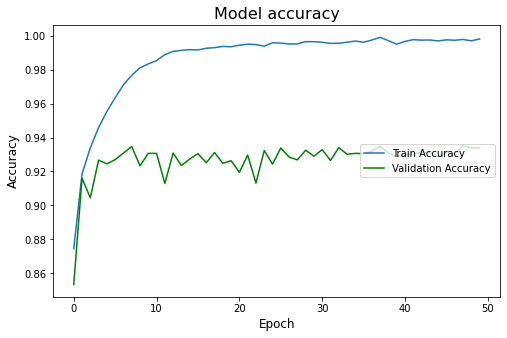

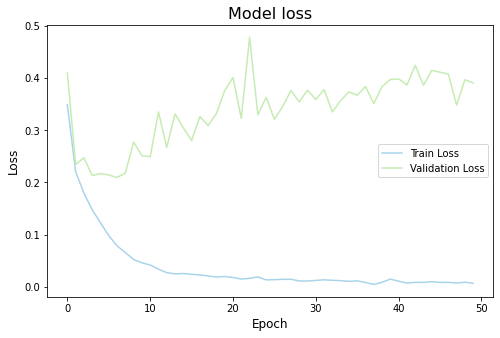

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy values
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('Model accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='right')
plt.show()

# Plot training loss values
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], color='#A8D4E9', label='Train Loss')
plt.plot(history.history['val_loss'], color='#C6ECB2', label='Validation Loss')
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='right')
plt.show()

Validation accuracy shows moderate overfitting.

---
**ConvNet | Orignal, predicted, probability, visual**

---

The following code shows correctly identified class for randomly selected images from test set. In addition, it provides additional insights on the probability of other classes.

Original:  4
Predicted:  [4]
Probability:  [[7.6436989e-16 5.1318567e-15 3.6924237e-13 2.1436586e-19 1.0000000e+00
  2.7269332e-15 1.6811940e-08 7.1772225e-16 6.5303752e-16 6.4235970e-14]]


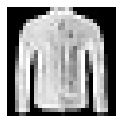

Original:  4
Predicted:  [4]
Probability:  [[8.1655051e-11 1.5071464e-10 6.8905670e-04 3.2149108e-14 9.9887735e-01
  7.8104252e-09 4.3355228e-04 4.8865480e-13 1.3352143e-14 1.5435122e-09]]


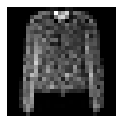

Original:  5
Predicted:  [5]
Probability:  [[9.9167640e-17 4.1622167e-16 2.1278951e-25 1.2622379e-17 6.8050385e-23
  1.0000000e+00 1.2845336e-17 5.2559133e-14 2.5185208e-15 2.9338914e-20]]


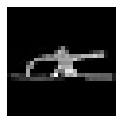

Original:  8
Predicted:  [8]
Probability:  [[2.9705600e-12 1.0038892e-11 1.0465011e-11 3.6698417e-14 1.6817692e-18
  1.6786328e-13 3.5229277e-08 8.2638281e-17 1.0000000e+00 2.9027739e-10]]


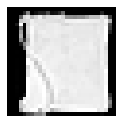

Original:  2
Predicted:  [2]
Probability:  [[3.0367139e-13 2.0532528e-15 1.0000000e+00 4.1891865e-15 2.0700780e-12
  9.1420351e-15 3.3679777e-17 1.5672983e-13 1.8065446e-14 5.6488955e-16]]


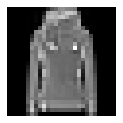

In [ ]:
for i in range(50,55):
  original = test_labels[i]
  img = test_images[i]
  test_img = img.reshape(1,28,28,1)

  predicted = model.predict_classes(test_img)
  prob = model.predict_proba(test_img)

  print("Original: ",np.argmax(original))
  print("Predicted: ",predicted)
  print("Probability: ",prob)

  #Predict
  #print(test_images.shape)
  plt.figure(figsize=(2,2))
  plt.imshow(test_images[i].reshape(28,28),cmap="gray")
  plt.axis("off")
  plt.show()

---
**ConvNet | Confusion Matrix**

---

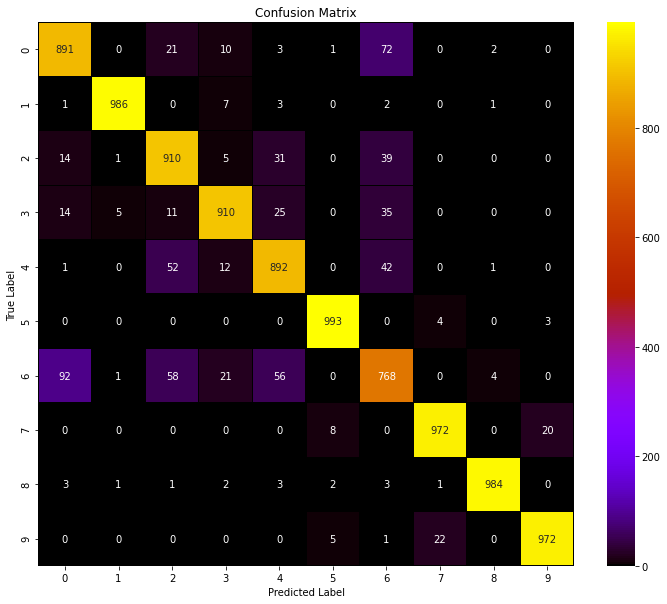

In [ ]:
import seaborn as sns

pred = model.predict(test_images)
pred_label = np.argmax(pred, axis = 1)
original_label = np.argmax(test_labels, axis = 1)
conf_matrix = confusion_matrix(original_label, pred_label) 

f,ax = plt.subplots(figsize = (12,10))
sns.heatmap(conf_matrix, annot=True, linewidths=0.1, cmap = "gnuplot", linecolor="black", fmt='.0f', ax=ax)
#ocean
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The color palette of confusion matrix very well shows a prevail number of successfully predicted labels.

---
**ConvNet | Number and percentage of correct predictions**

---

The percentage of correctly identified labels for every class. Classes 1, 5, 7 and 8 - this model suits the most. While class 6 shows the lowest predictability, with 180 out of 1000 images identified incorrectly.

In [ ]:
for i in range(len(conf_matrix)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(conf_matrix[i])-conf_matrix[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(conf_matrix[i][i] / 10))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 109 out of 1000
Percentage of True Prediction: 89.10%
***********************************************************
Class: 1
Number of Wrong Prediction: 14 out of 1000
Percentage of True Prediction: 98.60%
***********************************************************
Class: 2
Number of Wrong Prediction: 90 out of 1000
Percentage of True Prediction: 91.00%
***********************************************************
Class: 3
Number of Wrong Prediction: 90 out of 1000
Percentage of True Prediction: 91.00%
***********************************************************
Class: 4
Number of Wrong Prediction: 108 out of 1000
Percentage of True Prediction: 89.20%
***********************************************************
Class: 5
Number of Wrong Prediction: 7 out of 1000
Percentage of True Prediction: 99.30%
***********************************************************
Class: 6
Number of Wrong Prediction: 232 out of 1000
Percentage of True Prediction: 76.80%
********


### Task 1.3 Build an input pipeline for data augmentation

*(weight ~3%)*



---
**ConvNet + Data Augmentation | Keras ImageDataGenerator**

---

The most significant speed drop happens because google colab sometimes dissconect from GPU for the users that execute long computations.

The ImageDataGenerator execute rotation, zoom, width and hight changes. It allows to create additional data for training.

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
        rotation_range=0.1,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1) 

datagen.fit(train_images)


---
**ConvNet + Data Augmentation | Fit the model**

---

In [ ]:
# save the initial weights for later experiments
init_weights = model.get_weights()

epochs=50
batch_size=128

history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=batch_size),
                              shuffle=True,
                              epochs=epochs, validation_data = (val_images, val_labels),
                              verbose = 2, steps_per_epoch=train_images.shape[0] // batch_size)

Epoch 1/50
421/421 - 14s - loss: 0.4579 - accuracy: 0.8642 - val_loss: 0.2371 - val_accuracy: 0.9162
Epoch 2/50
421/421 - 13s - loss: 0.2982 - accuracy: 0.8948 - val_loss: 0.2111 - val_accuracy: 0.9262
Epoch 3/50
421/421 - 13s - loss: 0.2649 - accuracy: 0.9049 - val_loss: 0.1881 - val_accuracy: 0.9323
Epoch 4/50
421/421 - 13s - loss: 0.2459 - accuracy: 0.9104 - val_loss: 0.2019 - val_accuracy: 0.9258
Epoch 5/50
421/421 - 13s - loss: 0.2339 - accuracy: 0.9153 - val_loss: 0.2096 - val_accuracy: 0.9213
Epoch 6/50
421/421 - 13s - loss: 0.2240 - accuracy: 0.9178 - val_loss: 0.2163 - val_accuracy: 0.9263
Epoch 7/50
421/421 - 13s - loss: 0.2162 - accuracy: 0.9214 - val_loss: 0.1849 - val_accuracy: 0.9307
Epoch 8/50
421/421 - 14s - loss: 0.2078 - accuracy: 0.9245 - val_loss: 0.2017 - val_accuracy: 0.9278
Epoch 9/50
421/421 - 13s - loss: 0.2044 - accuracy: 0.9242 - val_loss: 0.1991 - val_accuracy: 0.9263
Epoch 10/50
421/421 - 13s - loss: 0.1975 - accuracy: 0.9266 - val_loss: 0.2083 - val_accura

---
**ConvNet + Data Augmentation | Comparison of accuracy ans loss for train/validation/test data**

---

In [ ]:
score = model.evaluate(test_images,test_labels,verbose=0)
print("Test Accuracy:",score[1])
print("Test Loss:",score[0])

Test Accuracy: 0.9373999834060669
Test Loss: 0.20556186139583588


Fashion Mnist Results (Task 1)

|   | Train Accuracy  | Train Loss  | Val Accuracy  | Val Loss   |  Test Accuracy | Test Loss |
|---|---|---|---|---|---|---|
| Original | 0.9034  | 0.2743  |  0.8899 |  0.3409 |  0.8856 |  0.3733 |
| ConvNet | 0.9980  | 0.0064  |  0.9338 |  0.3910 |  0.9277 |  0.4503 |
|  ConvNet + Data Augmentation | 0.9578  | 0.1120  |  0.9408 |  0.1828 |  0.9374 |  0.2056 |




The ConvNet + Data Augmentation has some overfitting, but overall high train accuracy and higher test accuracy than ConvNet without Data Augmentation. Additional parameter into DataImageGenerator could even more increse train set and improve test accuracy slightly more.

---
**ConvNet + Data Augmentation | Plot for the loss and accuracy, for train and validation data**

---

Validation accuracy shows little overfitting, but it is more stable after around 30 epoches.

The noisy movements of validation loss could mean some unrepresentativeness in the validation set.

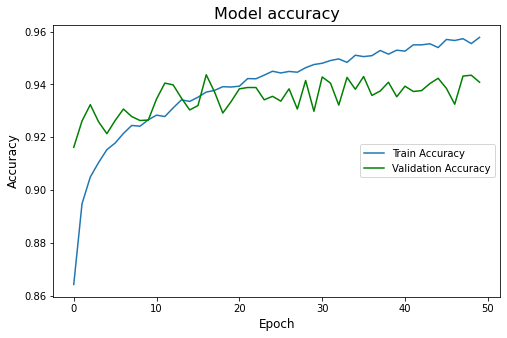

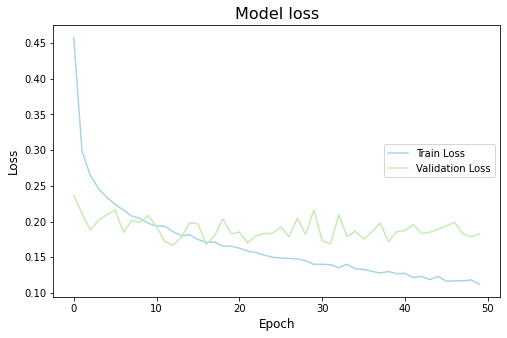

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy values
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('Model accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='right')
plt.show()

# Plot training loss values
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], color='#A8D4E9', label='Train Loss')
plt.plot(history.history['val_loss'], color='#C6ECB2', label='Validation Loss')
plt.title('Model loss', fontsize=16)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='right')
plt.show()

---
**ConvNet + Data Augmentation | Orignal, predicted, probability, visual**

---

Original:  4
Predicted:  [4]
Probability:  [[4.7513629e-07 4.5304767e-12 2.1024391e-05 2.4389553e-13 9.8775369e-01
  1.5056413e-12 1.2224699e-02 1.7992854e-13 1.9813436e-10 1.4488616e-12]]


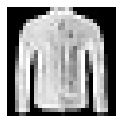

Original:  4
Predicted:  [4]
Probability:  [[1.2076400e-08 8.0366410e-13 1.5083005e-03 2.2856387e-12 9.6081704e-01
  1.2148524e-12 3.7674591e-02 9.2012640e-14 1.1034597e-12 1.3030837e-11]]


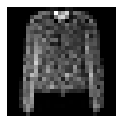

Original:  5
Predicted:  [5]
Probability:  [[1.8780863e-14 8.0863845e-18 7.7296964e-17 1.9154039e-16 5.3669155e-20
  1.0000000e+00 1.5243942e-14 1.9959399e-10 9.5624286e-10 5.4334412e-13]]


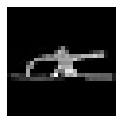

Original:  8
Predicted:  [8]
Probability:  [[4.0774296e-07 1.9513166e-13 1.8411312e-12 3.7482040e-10 7.7085080e-15
  1.9265180e-12 1.2503998e-04 7.5855824e-15 9.9987459e-01 2.8602876e-09]]


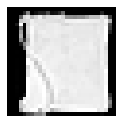

Original:  2
Predicted:  [2]
Probability:  [[4.0463007e-08 5.3563859e-13 9.9998188e-01 2.0370315e-11 1.5051290e-05
  5.0453419e-13 3.0091758e-06 8.8341662e-10 2.2205097e-10 1.1215914e-12]]


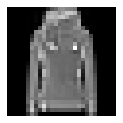

In [ ]:
for i in range(50,55):
  original = test_labels[i]
  img = test_images[i]
  test_img = img.reshape(1,28,28,1)

  predicted = model.predict_classes(test_img)
  prob = model.predict_proba(test_img)

  print("Original: ",np.argmax(original))
  print("Predicted: ",predicted)
  print("Probability: ",prob)

  #Predict
  #print(test_images.shape)
  plt.figure(figsize=(2,2))
  plt.imshow(test_images[i].reshape(28,28),cmap="gray")
  plt.axis("off")
  plt.show()

---
**ConvNet + Data Augmentation | Confusion Matrix**

---

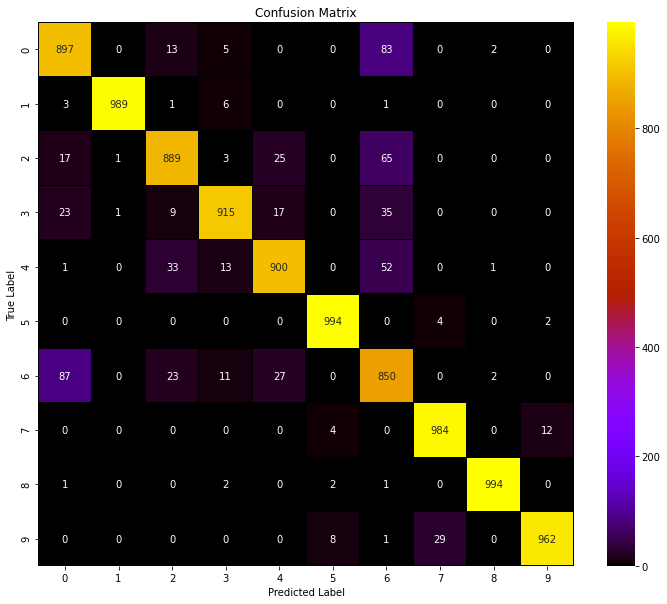

In [ ]:
import seaborn as sns

pred = model.predict(test_images)
pred_label = np.argmax(pred, axis = 1)
original_label = np.argmax(test_labels, axis = 1)
conf_matrix = confusion_matrix(original_label, pred_label) 

f,ax = plt.subplots(figsize = (12,10))
sns.heatmap(conf_matrix, annot=True, linewidths=0.1, cmap = "gnuplot", linecolor="black", fmt='.0f', ax=ax)
#ocean
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

---
**ConvNet + Data Augmentation | Number and percentage of correct predictions**

---

In [ ]:
for i in range(len(conf_matrix)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(conf_matrix[i])-conf_matrix[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(conf_matrix[i][i] / 10))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 103 out of 1000
Percentage of True Prediction: 89.70%
***********************************************************
Class: 1
Number of Wrong Prediction: 11 out of 1000
Percentage of True Prediction: 98.90%
***********************************************************
Class: 2
Number of Wrong Prediction: 111 out of 1000
Percentage of True Prediction: 88.90%
***********************************************************
Class: 3
Number of Wrong Prediction: 85 out of 1000
Percentage of True Prediction: 91.50%
***********************************************************
Class: 4
Number of Wrong Prediction: 100 out of 1000
Percentage of True Prediction: 90.00%
***********************************************************
Class: 5
Number of Wrong Prediction: 6 out of 1000
Percentage of True Prediction: 99.40%
***********************************************************
Class: 6
Number of Wrong Prediction: 150 out of 1000
Percentage of True Prediction: 85.00%
*******

### Task 1.4 Fashion-MNIST with transfer learning

*(weight ~3%)*




---
**Transfer Learning |  Without Fine-Tuning |  Import Libraries**

---

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, time
import matplotlib.pyplot as plt
#from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16;
from keras.applications import VGG19;
from keras.applications.vgg16 import preprocess_input
import os



import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


---
**Transfer Learning |  Without Fine-Tuning |  Load Data**

---

In [ ]:
#Train test split:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state = 2)

print(np.min(test_images))
print(np.max(test_images))
print(train_images.shape)
print(test_images.shape)

0
255
(54000, 28, 28)
(10000, 28, 28)


In [ ]:
print("train_images shape: ",train_images.shape)
print("val_images shape: ",val_images.shape)
print("test_images shape: ",test_images.shape)
print("train_labels shape: ",train_labels.shape)
print("val_labels shape: ",val_labels.shape)
print("test_labels shape: ",test_labels.shape)

train_images shape:  (54000, 28, 28)
val_images shape:  (6000, 28, 28)
test_images shape:  (10000, 28, 28)
train_labels shape:  (54000,)
val_labels shape:  (6000,)
test_labels shape:  (10000,)


---
**Transfer Learning |  Without Fine-Tuning |  Data Shape Transformation**

---

In [ ]:
train_images = train_images.reshape((54000, 28 * 28))
val_images = val_images.reshape((6000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Convert the training and test images into 3 channels
train_images = np.dstack([train_images]*3)
val_images = np.dstack([val_images]*3)
test_images = np.dstack([test_images]*3)

train_images = train_images.reshape((54000, 28,28,3))
val_images = val_images.reshape((6000, 28,28,3))
test_images = test_images.reshape((10000, 28,28,3))

# Resize the images 150*150 as required by VGG19
from keras.preprocessing.image import img_to_array, array_to_img
train_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((50,50))) for im in train_images])
val_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((50,50))) for im in val_images])
test_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((50,50))) for im in test_images])

# Data Shape:
print("test_images shape: ",train_images.shape)
print("train_images shape: ",val_images.shape)
print("test_images shape: ",test_images.shape)

test_images shape:  (54000, 50, 50, 3)
train_images shape:  (6000, 50, 50, 3)
test_images shape:  (10000, 50, 50, 3)


---
**Transfer Learning |  Without Fine-Tuning |  Normalization, labels to cathegorical**

---

In [ ]:
max =255
#Normalization:
train_images = train_images.astype('float32')/max
val_images = val_images.astype('float32')/max
test_images = test_images.astype('float32')/max

#Labels to cathegorical
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

---
**Transfer Learning |  Without Fine-Tuning |  Preprocessing the input**

---

In [ ]:
# Preprocessing the input 
train_images = preprocess_input(train_images)
val_images = preprocess_input(val_images)
test_images  = preprocess_input (test_images)

---
**Transfer Learning |  Without Fine-Tuning |  Model base and summary**

---

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(50, 50, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

---
**Transfer Learning |  Without Fine-Tuning |  To freeze the model**

---

In [ ]:
conv_base.trainable = False # to freeze the model

---
**Transfer Learning |  Without Fine-Tuning |  Extracting features**

---

In [ ]:
batch_size=128

# Extracting features
train_features = conv_base.predict(np.array(train_images), batch_size=batch_size, verbose=1)
test_features = conv_base.predict(np.array(test_images), batch_size=batch_size, verbose=1)
val_features = conv_base.predict(np.array(val_images), batch_size=batch_size, verbose=1)

47/47 [==============================] - 2s 34ms/step


---
**Transfer Learning |  Without Fine-Tuning |  Check Features Shape**

---

In [ ]:
# Current shape of features
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(54000, 1, 1, 512) 
 (10000, 1, 1, 512) 
 (6000, 1, 1, 512)


---
**Transfer Learning |  Without Fine-Tuning |  To freeze the model**

---Flatten extracted features

In [ ]:
# Flatten extracted features
train_flat = np.reshape(train_features, (54000, 1*1*512))
test_flat = np.reshape(test_features, (10000, 1*1*512))
val_flat = np.reshape(val_features, (6000, 1*1*512))

---
**Transfer Learning |  Without Fine-Tuning |  Create The Model and Model Summary**

---

In [ ]:
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU

def make_model():
  model = models.Sequential()
  model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
  model.add(layers.LeakyReLU(alpha=0.1))
  model.add(layers.Dense(10, activation='softmax'))

  # Compile the model.
  model.compile(loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    # optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

  return model

model = make_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________


---
**Transfer Learning |  Without Fine-Tuning |  Incorporating reduced learning and early stopping for callback**

---


In [ ]:
callbacks = [ 
  tf.keras.callbacks.ModelCheckpoint('best_model', monitor='val_accuracy', verbose=1, save_best_only=True),
  tf.keras.callbacks.ReduceLROnPlateau( factor = 0.1, patience = 3, min_lr = 0.00001, verbose = 1 )
 ]

---
**Transfer Learning |  Without Fine-Tuning |  Train the Model**

---


In [ ]:
 # Train the the model
history = model.fit(
    train_flat,
    train_labels,
    batch_size=128,
    epochs=50,
    validation_data=(val_flat, val_labels),
    callbacks=callbacks
)

Epoch 1/50
422/422 [==============================] - 2s 3ms/step - loss: 2.3347 - acc: 0.2460 - val_loss: 1.5566 - val_acc: 0.4165
Epoch 2/50
422/422 [==============================] - 1s 3ms/step - loss: 1.4739 - acc: 0.4638 - val_loss: 1.3272 - val_acc: 0.4778
Epoch 3/50
422/422 [==============================] - 1s 3ms/step - loss: 1.2829 - acc: 0.5231 - val_loss: 1.2456 - val_acc: 0.5527
Epoch 4/50
422/422 [==============================] - 1s 3ms/step - loss: 1.1984 - acc: 0.5560 - val_loss: 1.1408 - val_acc: 0.5870
Epoch 5/50
422/422 [==============================] - 1s 3ms/step - loss: 1.1382 - acc: 0.5787 - val_loss: 1.2074 - val_acc: 0.5470
Epoch 6/50
422/422 [==============================] - 1s 3ms/step - loss: 1.1051 - acc: 0.5889 - val_loss: 1.1591 - val_acc: 0.5527
Epoch 7/50
422/422 [==============================] - 1s 3ms/step - loss: 1.0757 - acc: 0.6012 - val_loss: 1.0586 - val_acc: 0.6172
Epoch 8/50
422/422 [==============================] - 1s 3ms/step - loss: 1.

---
**Transfer Learning |  Without Fine-Tuning |  Test loss/accuracy**

---


In [ ]:
score =model.evaluate(test_flat,test_labels,verbose=0)
print("Test Accuracy:",score[1])
print("Test Loss:",score[0])

Test Accuracy: 0.720300018787384
Test Loss: 0.7969239354133606


---
**Transfer Learning |  Without Fine-Tuning |  Plot Train/Test Accuracy and Loss**

---


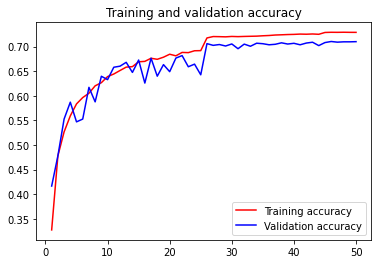

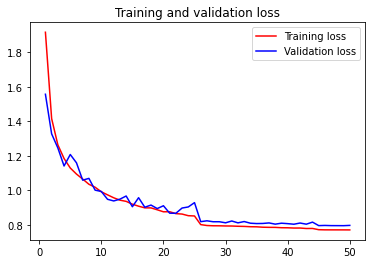

In [ ]:
# plot the loss and accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

Validation accuracy shows little overfitting.

Fashion Mnist Results (Task 1)

|   | Train Accuracy  | Train Loss  | Val Accuracy  | Val Loss   |  Test Accuracy | Test Loss |
|---|---|---|---|---|---|---|
| Original | 0.9034  | 0.2743  |  0.8899 |  0.3409 |  0.8856 |  0.3733 |
| ConvNet | 0.9980  | 0.0064  |  0.9338 |  0.3910 |  0.9277 |  0.4503 |
|  ConvNet + Data Augmentation | 0.9578  | 0.1120  |  0.9408 |  0.1828 |  0.9374 |  0.2056 |
| Transfer Learning Without Fine-Tuning  | 0.7302  | 0.7712  |  0.7100 |  0.7964 |  0.7203 |  0.7969 |

---

---
**Transfer Learning |  With Fine-Tuning** |  **Set**

---


In [ ]:
# To unfreeze the model
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

---
**Transfer Learning |  With Fine-Tuning** |  **Model**

---


In [ ]:
model = make_model()
model.compile(loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    # optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])


fine_tuned_history = model.fit(
    train_flat,
    train_labels,
    batch_size=128,
    epochs=50,
    validation_data=(val_flat, val_labels),
    callbacks=callbacks
)

model.summary()

Epoch 1/50
422/422 [==============================] - 2s 3ms/step - loss: 2.5130 - acc: 0.2250 - val_loss: 1.5772 - val_acc: 0.4680
Epoch 2/50
422/422 [==============================] - 1s 3ms/step - loss: 1.4735 - acc: 0.4577 - val_loss: 1.3125 - val_acc: 0.4778
Epoch 3/50
422/422 [==============================] - 1s 3ms/step - loss: 1.2910 - acc: 0.5139 - val_loss: 1.2643 - val_acc: 0.4870
Epoch 4/50
422/422 [==============================] - 1s 3ms/step - loss: 1.1928 - acc: 0.5488 - val_loss: 1.1536 - val_acc: 0.5805
Epoch 5/50
422/422 [==============================] - 1s 3ms/step - loss: 1.1230 - acc: 0.5916 - val_loss: 1.1410 - val_acc: 0.5897
Epoch 6/50
422/422 [==============================] - 1s 3ms/step - loss: 1.0944 - acc: 0.5972 - val_loss: 1.0833 - val_acc: 0.5877
Epoch 7/50
422/422 [==============================] - 1s 3ms/step - loss: 1.0533 - acc: 0.6110 - val_loss: 1.0331 - val_acc: 0.6017
Epoch 8/50
422/422 [==============================] - 1s 3ms/step - loss: 1.

---
**Transfer Learning |  With Fine-Tuning |  Test Accuracy and Loss**

---


In [ ]:
# Test Accuracy/Loss

score = model.evaluate(test_flat,test_labels,verbose=0)
print("Test Accuracy:",score[1])
print("Test Loss:",score[0])

Test Accuracy: 0.7074000239372253
Test Loss: 0.8288720846176147


---
**Transfer Learning |  With Fine-Tuning |  Plot Train/Test Accuracy and Loss**

---


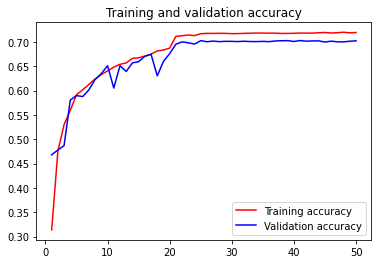

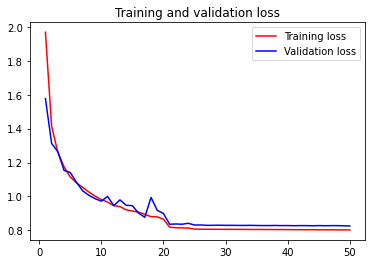

In [ ]:
# plot the loss and accuracy

acc = fine_tuned_history.history['acc']
val_acc = fine_tuned_history.history['val_acc']
loss = fine_tuned_history.history['loss']
val_loss = fine_tuned_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

Validation accuracy shows little overfitting.

### Task 1.5 Performance comparison

*(weight ~3%)*



Fashion Mnist Results (Task 1)

|   | Train Accuracy  | Train Loss  | Val Accuracy  | Val Loss   |  Test Accuracy | Test Loss |
|---|---|---|---|---|---|---|
| Original | 0.9034  | 0.2743  |  0.8899 |  0.3409 |  0.8856 |  0.3733 |
| ConvNet | 0.9980  | 0.0064  |  0.9338 |  0.3910 |  0.9277 |  0.4503 |
|  ConvNet + Data Augmentation | 0.9578  | 0.1120  |  0.9408 |  0.1828 |  0.9374 |  0.2056 |
| Transfer Learning Without Fine-Tuning  | 0.7302  | 0.7712  |  0.7100 |  0.7964 |  0.7203 |  0.7969 |
| Transfer Learning With Fine-Tuning  | 0.7176  | 0.8032  |  0.7022 |  0.8256 |  0.7074 |  0.8289 |

---

Transfer Learning shows more poor results than original model or ConvNet model.

---
**Transfer Learning |  With Fine-Tuning |  Plot Train/Test Accuracy and Loss**

---

**How many parameters are trainable in each of the two settings (with and without fine-tuning)? How does the difference impact the training time?**

There are 267,786 parameters in the model with fine tuning. For this example training time differs insignificantly.

Which setting achieved higher accuracy? Why did it work better for this problem?

The Transfer Learning with Fine-Tuning archived a slightly smaller test accuracy for this exmaple.

**Have we benefitted from using the pretrained model?**

It is useful because it could help to save time.
Also, when the data is too large and has similarities it could show good results. 

Fine-tuned model shows very similar results for this example. Since the Fashion Mnist dataset is big and has a lot of similar data, then almost the same accuracy result on the model without Fine-Tuning is expected.

## Task 2 Fast training of deep networks

*(weight ~20%)*

### Task 2.1 Train a highly accurate network for CIFAR10

*(weight ~7%)*




#### Task 2.1.1 Document the hardware used



---
**Fast Training |  "Shallow" CovNet |  Check the number of GPUs, and the GPU memory**

---



In [ ]:
!nvidia-smi

Thu May 20 02:56:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    31W /  70W |   4928MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

---
**Fast Training |  "Shallow" CovNet |  Check the number of GPUs, and the GPU memory**

---



In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

#### Task 2.1.2 Train a "shallow" ConvNet



---
**Fast Training |  "Shallow" CovNet |  Import libraries**

---



In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

---
**Fast Training |  "Shallow" CovNet |  Import Cifar10 dataset**

---



In [ ]:
cifar10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(np.min(test_images))
print(np.max(test_images))
print(train_images.shape)
print(test_images.shape)

0
255
(50000, 32, 32, 3)
(10000, 32, 32, 3)


---
**Fast Training |  "Shallow" CovNet |  Plot 9 images**

---



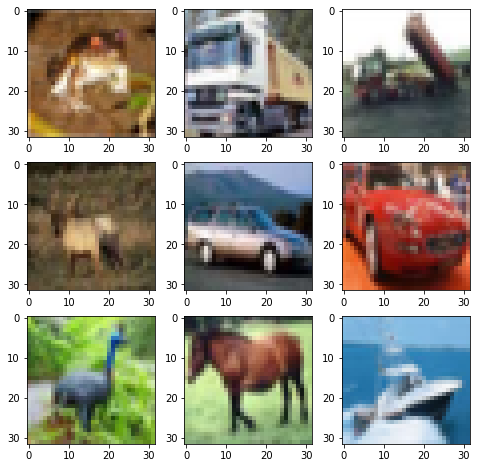

In [ ]:
#Plot of 25 images:
plt.figure(figsize=(8,8))
for i in range(9):
	# Define subplot:
	pyplot.subplot(3, 3, + 1 + i)
	# Raw pixel data:
	pyplot.imshow(train_images[i])
#Show
pyplot.show()

---
**Fast Training |  "Shallow" CovNet |  Transform Image**

---



In [ ]:
# Resize the images 150*150 as required by VGG19
from keras.preprocessing.image import img_to_array, array_to_img
train_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((28,28))) for im in train_images])
test_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((28,28))) for im in test_images])

print(np.min(test_images))
print(np.max(test_images))
print(train_images.shape)
print(test_images.shape)

0.0
255.0
(50000, 28, 28, 3)
(10000, 28, 28, 3)


---
**Fast Training |  "Shallow" CovNet |  Preprocessing**

---



In [ ]:
# Max value in the image set:
max = np.max(train_images)

#Normalization:
train_images = train_images.astype('float32')/max
test_images = test_images.astype('float32')/max

#Labels to cathegorical
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(np.min(test_images))
print(np.max(test_images))
print(train_images.shape)
print(test_images.shape)

0.0
1.0
(50000, 28, 28, 3)
(10000, 28, 28, 3)


---
**Fast Training |  "Shallow" CovNet |  Train/Validation Split**

---

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state = 2)
print("train_images shape: ",train_images.shape)
print("test_images shape: ",test_images.shape)
print("val_images shape: ",val_images.shape)
print("train_labels shape: ",train_labels.shape)
print("test_lables shape: ",test_labels.shape)
print("val_labels shape :",val_labels.shape)

train_images shape:  (45000, 28, 28, 3)
test_images shape:  (10000, 28, 28, 3)
val_images shape:  (5000, 28, 28, 3)
train_labels shape:  (45000, 10)
test_lables shape:  (10000, 10)
val_labels shape : (5000, 10)


---
**Fast Training |  "Shallow" CovNet |  Build the Model**

---

This model has 2 Conv2D layers, 2 Max Pooling Layers and 3 Dense layers. The input shape is (28, 28, 3)


In [ ]:
from keras.models import Sequential, model_from_json # Create the model
input_shape = (28, 28, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

---
**Fast Training |  "Shallow" CovNet |  Compile the Model and Fit the Data**

---



In [ ]:
# Compile the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])


init_weights = model.get_weights()

batch_size=128
# Fit data to model
history = model.fit(train_images, train_labels,
            batch_size=batch_size,
            epochs=50,
            validation_data = (val_images, val_labels),
            verbose=1,
            steps_per_epoch=train_images.shape[0] // batch_size)

Epoch 1/50
351/351 [==============================] - 3s 6ms/step - loss: 1.8679 - accuracy: 0.3052 - val_loss: 1.3939 - val_accuracy: 0.4970
Epoch 2/50
351/351 [==============================] - 2s 5ms/step - loss: 1.3334 - accuracy: 0.5206 - val_loss: 1.2334 - val_accuracy: 0.5726
Epoch 3/50
351/351 [==============================] - 2s 5ms/step - loss: 1.1900 - accuracy: 0.5771 - val_loss: 1.1580 - val_accuracy: 0.5916
Epoch 4/50
351/351 [==============================] - 2s 6ms/step - loss: 1.0872 - accuracy: 0.6185 - val_loss: 1.1079 - val_accuracy: 0.6102
Epoch 5/50
351/351 [==============================] - 2s 5ms/step - loss: 1.0036 - accuracy: 0.6464 - val_loss: 1.0273 - val_accuracy: 0.6426
Epoch 6/50
351/351 [==============================] - 2s 5ms/step - loss: 0.9495 - accuracy: 0.6683 - val_loss: 1.0064 - val_accuracy: 0.6450
Epoch 7/50
351/351 [==============================] - 2s 6ms/step - loss: 0.8972 - accuracy: 0.6854 - val_loss: 0.9848 - val_accuracy: 0.6650
Epoch 

**Part 2. Cifar-10**


As expected, the Shallow 'CovNet' shows low test accuracy overfitting in the train/validation accuracy plot.


|   | Train Accuracy  | Train Loss  | Val Accuracy  | Val Loss   |  Test Accuracy | Test Loss |
|---|---|---|---|---|---|---|
| Fast Training, "Shallow" CovNet   | 0.9723  | 0.0789  |  0.6656 |  2.5531 |  0.6713 |  2.6417 | 


---
**Fast Training |  "Shallow" CovNet |  Test Loss and Test Accuracy**

---



In [ ]:
# Test Accuracy/Loss
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.6416516304016113 / Test accuracy: 0.6712999939918518


---
**Fast Training |  "Shallow" CovNet |  Plot train/validation loss and accuracy**

---



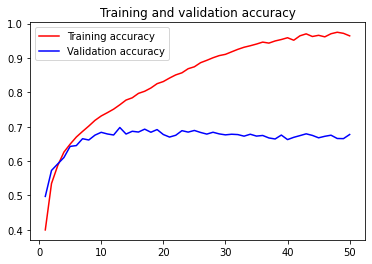

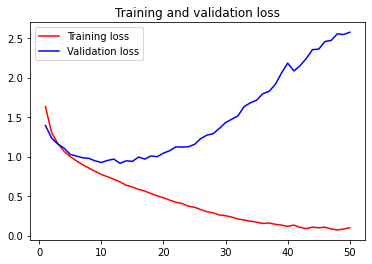

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()


The validation accuracy shows strong overfitting.

#### Task 2.1.3 Train a ResNet


---
**Fast Training |  ResNet |  Import Libraries**

---

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)


2.4.1
2.4.0


---
**Fast Training |  ResNet |  Import Dataset**

---

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(np.min(test_images))
print(np.max(test_images))
print(train_images.shape)
print(test_images.shape)

0
255
(50000, 32, 32, 3)
(10000, 32, 32, 3)


---
**Fast Training |  ResNet |  Preproccesing**

---



In [ ]:
# Max value in the image set:
max = np.max(train_images)

#Normalization:
train_images = train_images.astype('float32')/max
test_images = test_images.astype('float32')/max

#Labels to cathegorical
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

---
**Fast Training |  ResNet |  Train/Validation Split**

---

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state = 2)
print("train_images shape: ",train_images.shape)
print("test_images shape: ",test_images.shape)
print("val_images shape: ",val_images.shape)
print("train_labels shape: ",train_labels.shape)
print("test_lables shape: ",test_labels.shape)
print("val_labels shape :",val_labels.shape)

train_images shape:  (45000, 32, 32, 3)
test_images shape:  (10000, 32, 32, 3)
val_images shape:  (5000, 32, 32, 3)
train_labels shape:  (45000, 10)
test_lables shape:  (10000, 10)
val_labels shape : (5000, 10)


---
**Fast Training |  ResNet |  Custom ResidualUnit layer and Create Model and Summar**

---

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", 
                        use_bias=False,
                        kernel_regularizer=keras.regularizers.l2(0.01)
                        )

DefaultSeparableConv2D = partial(keras.layers.SeparableConv2D, kernel_size=3, strides=1,
                                 padding="SAME", 
                                 use_bias=False,
                                 kernel_regularizer=keras.regularizers.l2(0.01))

class DepthwiseResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultSeparableConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultSeparableConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

model = keras.models.Sequential()

prev_filters = 64
c = [prev_filters, 2*prev_filters, 4*prev_filters, 4*prev_filters]
model.add(DefaultConv2D(c[0], 
                        input_shape=[32, 32, 3]))
model.add(DepthwiseResidualUnit(c[0], strides=1))
model.add(DepthwiseResidualUnit(c[1], strides=2))
model.add(DepthwiseResidualUnit(c[2], strides=2))
model.add(DepthwiseResidualUnit(c[3], strides=2))
model.add(keras.layers.MaxPool2D(pool_size=(4, 4)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="sigmoid"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1728      
_________________________________________________________________
depthwise_residual_unit (Dep (None, 32, 32, 64)        9856      
_________________________________________________________________
depthwise_residual_unit_1 (D (None, 16, 16, 128)       36032     
_________________________________________________________________
depthwise_residual_unit_2 (D (None, 8, 8, 256)         137600    
_________________________________________________________________
depthwise_residual_unit_3 (D (None, 4, 4, 256)         204288    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

---
**Fast Training |  ResNet |  Compile and Fit the model**

---

In [ ]:
#%%time


init_weights = model.get_weights()


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_data=(val_images, val_labels), verbose=1)

Epoch 1/50
352/352 [==============================] - 18s 44ms/step - loss: 5.5513 - accuracy: 0.3663 - val_loss: 3.4680 - val_accuracy: 0.1048
Epoch 2/50
352/352 [==============================] - 15s 42ms/step - loss: 1.8800 - accuracy: 0.5917 - val_loss: 1.9868 - val_accuracy: 0.4406
Epoch 3/50
352/352 [==============================] - 15s 42ms/step - loss: 1.1607 - accuracy: 0.6953 - val_loss: 1.3412 - val_accuracy: 0.6070
Epoch 4/50
352/352 [==============================] - 15s 42ms/step - loss: 0.9132 - accuracy: 0.7514 - val_loss: 1.0961 - val_accuracy: 0.6820
Epoch 5/50
352/352 [==============================] - 15s 41ms/step - loss: 0.7761 - accuracy: 0.7878 - val_loss: 1.2369 - val_accuracy: 0.6562
Epoch 6/50
352/352 [==============================] - 15s 42ms/step - loss: 0.6709 - accuracy: 0.8188 - val_loss: 0.9611 - val_accuracy: 0.7104
Epoch 7/50
352/352 [==============================] - 15s 42ms/step - loss: 0.5857 - accuracy: 0.8452 - val_loss: 1.0758 - val_accuracy:

**Part 2. Cifar-10**

The 'ResNet' has better test accuracy smaller test loss and less overffiting on the train/val accuracy plot.

|   | Train Accuracy  | Train Loss  | Val Accuracy  | Val Loss   |  Test Accuracy | Test Loss |
|---|---|---|---|---|---|---|
| Fast Training, "Shallow" CovNet   | 0.9723  | 0.0789  |  0.6656 |  2.5531 |  0.6713 |  2.6417 | 2 
| Fast Training of ResNet  | 0.9890  | 0.0708  |  0.7800 |  1.1889 |  0.7792 |  1.1887 | 15



---
**Fast Training |  ResNet |  Test Loss and Test Accuracy**

---


In [ ]:
# Test Accuracy/Loss
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.1887378692626953 / Test accuracy: 0.77920001745224


---
**Fast Training |  ResNet |  Plot train/validation loss and accuracy**

---

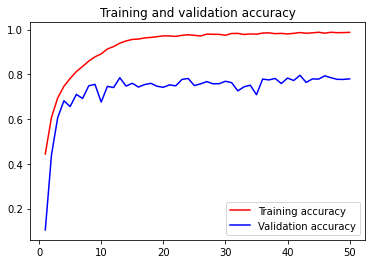

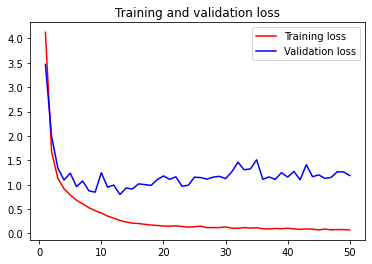

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()


The loss plot might show that the model is trained for too long

In [ ]:
!nvidia-smi

Thu May 20 03:11:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    44W /  70W |   4928MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

---
**Fast Training |  ResNet (prepared model ResNet50) |  Create ResNet50 Model**

---

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(classes=10, weights=None, input_shape=(32, 32, 3))

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

---
**Fast Training |  ResNet (prepared model ResNet50) |  Compile and Fit the model**

---

In [ ]:
#%%time

init_weights = model.get_weights()


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_data=(val_images, val_labels), verbose=1)

Epoch 1/50
352/352 [==============================] - 35s 79ms/step - loss: 2.2629 - accuracy: 0.2945 - val_loss: 10904.2842 - val_accuracy: 0.1010
Epoch 2/50
352/352 [==============================] - 25s 72ms/step - loss: 1.7530 - accuracy: 0.3943 - val_loss: 3.1015 - val_accuracy: 0.2094
Epoch 3/50
352/352 [==============================] - 25s 71ms/step - loss: 1.9736 - accuracy: 0.3738 - val_loss: 7.6342 - val_accuracy: 0.2644
Epoch 4/50
352/352 [==============================] - 25s 71ms/step - loss: 1.7616 - accuracy: 0.3966 - val_loss: 19.3433 - val_accuracy: 0.2522
Epoch 5/50
352/352 [==============================] - 25s 71ms/step - loss: 1.7758 - accuracy: 0.4081 - val_loss: 4.7143 - val_accuracy: 0.2936
Epoch 6/50
352/352 [==============================] - 25s 71ms/step - loss: 1.6267 - accuracy: 0.4412 - val_loss: 1.6591 - val_accuracy: 0.4074
Epoch 7/50
352/352 [==============================] - 25s 72ms/step - loss: 1.5315 - accuracy: 0.4840 - val_loss: 50.5493 - val_acc

**Part 2. Cifar-10**

The prepared (downloaded) ResNet50 model had an accuracy compared to Shallow 'Covnet'. Overall, it has more poor results, in comparison to the constructed 'ResNet'. Plot shows unstable results that demonstrate unbalanced performance of the model.

|   | Train Accuracy  | Train Loss  | Val Accuracy  | Val Loss   |  Test Accuracy | Test Loss |
|---|---|---|---|---|---|---|
| Fast Training, "Shallow" CovNet   | 0.9723  | 0.0789  |  0.6656 |  2.5531 |  0.6713 |  2.6417 | 2 
| Fast Training of ResNet  | 0.9890  | 0.0708  |  0.7800 |  1.1889 |  0.7792 |  1.1887 | 15
|  Fast Training of ResNet (prepared model ResNet50) | 0.8575  | 0.4610  |  0.6902 |  1.2436 |  0.6920 |  1.2080 | 25


---
**Fast Training |  ResNet (prepared model ResNet50) |  Test Loss and Test Accuracy**

---

In [ ]:
# Test Accuracy/Loss
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.207942247390747 / Test accuracy: 0.6919999718666077


---
**Fast Training |  ResNet (prepared model ResNet50) |  Plot train/validation loss and accuracy**

---

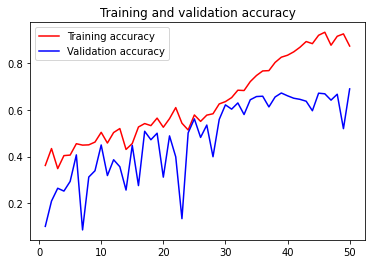

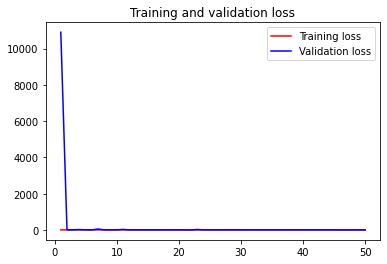

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()


### Task 2.2 Fast training of ResNet

*(weight ~10%)*


#### Option 1. Learning rate schedule


#### Option 2. Look ahead optimiser


---
**Fast Training |  Fast Training of ResNet |   + Step Decay Learning Rate**

---
Select the first custom ResNet model over loaded ResNet50 due to higher test accuracy.

Libraries, Data Preproccesing, Train/Validation Split, Sample Selection

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)


cifar10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(np.min(test_images))
print(np.max(test_images))
print(train_images.shape)
print(test_images.shape)


# Max value in the image set:
max = np.max(train_images)

#Normalization:
train_images = train_images.astype('float32')/max
test_images = test_images.astype('float32')/max

#Labels to cathegorical
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state = 2)
print("train_images shape: ",train_images.shape)
print("test_images shape: ",test_images.shape)
print("val_images shape: ",val_images.shape)
print("train_labels shape: ",train_labels.shape)
print("test_lables shape: ",test_labels.shape)
print("val_labels shape :",val_labels.shape)

2.4.1
2.4.0
0
255
(50000, 32, 32, 3)
(10000, 32, 32, 3)
train_images shape:  (45000, 32, 32, 3)
test_images shape:  (10000, 32, 32, 3)
val_images shape:  (5000, 32, 32, 3)
train_labels shape:  (45000, 10)
test_lables shape:  (10000, 10)
val_labels shape : (5000, 10)


---
**Fast Training |  Fast Training of ResNet |  + Step Decay Learning Rate: Create, Compile the Model**

---

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", 
                        use_bias=False,
                        kernel_regularizer=keras.regularizers.l2(0.01)
                        )

DefaultSeparableConv2D = partial(keras.layers.SeparableConv2D, kernel_size=3, strides=1,
                                 padding="SAME", 
                                 use_bias=False,
                                 kernel_regularizer=keras.regularizers.l2(0.01))

class DepthwiseResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultSeparableConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultSeparableConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

model = keras.models.Sequential()

prev_filters = 64
c = [prev_filters, 2*prev_filters, 4*prev_filters, 4*prev_filters]
model.add(DefaultConv2D(c[0], 
                        input_shape=[32, 32, 3]))
model.add(DepthwiseResidualUnit(c[0], strides=1))
model.add(DepthwiseResidualUnit(c[1], strides=2))
model.add(DepthwiseResidualUnit(c[2], strides=2))
model.add(DepthwiseResidualUnit(c[3], strides=2))
model.add(keras.layers.MaxPool2D(pool_size=(4, 4)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="sigmoid"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 64)        1728      
_________________________________________________________________
depthwise_residual_unit_4 (D (None, 32, 32, 64)        9856      
_________________________________________________________________
depthwise_residual_unit_5 (D (None, 16, 16, 128)       36032     
_________________________________________________________________
depthwise_residual_unit_6 (D (None, 8, 8, 256)         137600    
_________________________________________________________________
depthwise_residual_unit_7 (D (None, 4, 4, 256)         204288    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)              

---
**Fast Training |  Fast Training of ResNet |  + Step Decay Learning Rate (0.01) | Train the Model**

---

In [ ]:
BATCH_SIZE=128
EPOCHS = 50

init_weights = model.get_weights()

model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.01),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_images, val_labels), verbose=1)

Epoch 1/50
352/352 [==============================] - 16s 43ms/step - loss: 6.7580 - accuracy: 0.3055 - val_loss: 4.9281 - val_accuracy: 0.2652
Epoch 2/50
352/352 [==============================] - 15s 42ms/step - loss: 4.1482 - accuracy: 0.4868 - val_loss: 3.8327 - val_accuracy: 0.4320
Epoch 3/50
352/352 [==============================] - 15s 42ms/step - loss: 3.5151 - accuracy: 0.5362 - val_loss: 3.5050 - val_accuracy: 0.4734
Epoch 4/50
352/352 [==============================] - 15s 42ms/step - loss: 3.1608 - accuracy: 0.5635 - val_loss: 3.0896 - val_accuracy: 0.5374
Epoch 5/50
352/352 [==============================] - 15s 41ms/step - loss: 2.9208 - accuracy: 0.5844 - val_loss: 3.0167 - val_accuracy: 0.5078
Epoch 6/50
352/352 [==============================] - 15s 41ms/step - loss: 2.7579 - accuracy: 0.5973 - val_loss: 3.0530 - val_accuracy: 0.4816
Epoch 7/50
352/352 [==============================] - 15s 42ms/step - loss: 2.6122 - accuracy: 0.6141 - val_loss: 2.8543 - val_accuracy:

In [ ]:
# Test Accuracy/Loss
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.790257215499878 / Test accuracy: 0.6064000129699707


###Experiments with different Learning Rate:

Learning rate of 0.05 gives the best result on the test set:

(based on one experiment above and three below)

---
| Learning Rate  | Train Accuracy  | Train Loss  | Val Accuracy  | Val Loss   |  Test Accuracy | Test Loss |
|---|---|---|---|---|---|---|
| 0.01   | 0.7780  | 1.3682  |  0.6126 |  1.8001 |  0.6064 |  1.7903 |
| 0.05  | 0.9986  | 0.1061  |  0.7344 |  0.9807 |  0.7371 |  0.9719 |
|  0.09 | 0.9486  | 0.3470  |  0.6232 |  1.3595 |  0.6289 |  1.3455 |
|  0.001 | 0.9959  | 0.2140  |  0.6618 |  1.2074 |  0.6717 |  1.1910 |

Training time is 15s per epoch for every experiment.


---
**Fast Training |  Fast Training of ResNet |  + Step Decay Learning Rate (0.05)**

---

In [ ]:
BATCH_SIZE=128
EPOCHS = 50

init_weights = model.get_weights()

model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=0.05, momentum=0.9, decay=0.01),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_images, val_labels), verbose=1)

Epoch 1/50
352/352 [==============================] - 16s 43ms/step - loss: 3.8322 - accuracy: 0.2720 - val_loss: 2.2880 - val_accuracy: 0.2772
Epoch 2/50
352/352 [==============================] - 15s 42ms/step - loss: 1.6646 - accuracy: 0.4580 - val_loss: 1.8176 - val_accuracy: 0.3940
Epoch 3/50
352/352 [==============================] - 15s 42ms/step - loss: 1.3883 - accuracy: 0.5436 - val_loss: 1.6633 - val_accuracy: 0.4326
Epoch 4/50
352/352 [==============================] - 15s 42ms/step - loss: 1.2045 - accuracy: 0.6094 - val_loss: 1.3132 - val_accuracy: 0.5610
Epoch 5/50
352/352 [==============================] - 15s 42ms/step - loss: 1.0670 - accuracy: 0.6644 - val_loss: 1.2900 - val_accuracy: 0.5922
Epoch 6/50
352/352 [==============================] - 15s 42ms/step - loss: 0.9708 - accuracy: 0.6990 - val_loss: 1.1943 - val_accuracy: 0.6208
Epoch 7/50
352/352 [==============================] - 15s 42ms/step - loss: 0.8871 - accuracy: 0.7303 - val_loss: 1.2678 - val_accuracy:

In [ ]:
# Test Accuracy/Loss
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.9718724489212036 / Test accuracy: 0.7371000051498413


---
**Fast Training |  Fast Training of ResNet |  + Step Decay Learning Rate (0.09)**

---

In [ ]:
BATCH_SIZE=128
EPOCHS = 50

init_weights = model.get_weights()

model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=0.09, momentum=0.9, decay=0.01),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_images, val_labels), verbose=1)

Epoch 1/50
352/352 [==============================] - 16s 42ms/step - loss: 10.5890 - accuracy: 0.2384 - val_loss: 2.4095 - val_accuracy: 0.1860
Epoch 2/50
352/352 [==============================] - 15s 42ms/step - loss: 1.7845 - accuracy: 0.4119 - val_loss: 2.2563 - val_accuracy: 0.2244
Epoch 3/50
352/352 [==============================] - 15s 42ms/step - loss: 1.5520 - accuracy: 0.4819 - val_loss: 1.6738 - val_accuracy: 0.4422
Epoch 4/50
352/352 [==============================] - 15s 42ms/step - loss: 1.4254 - accuracy: 0.5279 - val_loss: 1.6528 - val_accuracy: 0.4556
Epoch 5/50
352/352 [==============================] - 15s 42ms/step - loss: 1.3466 - accuracy: 0.5550 - val_loss: 1.7461 - val_accuracy: 0.4590
Epoch 6/50
352/352 [==============================] - 15s 42ms/step - loss: 1.2716 - accuracy: 0.5861 - val_loss: 1.3602 - val_accuracy: 0.5570
Epoch 7/50
352/352 [==============================] - 15s 42ms/step - loss: 1.2224 - accuracy: 0.6089 - val_loss: 1.5118 - val_accuracy

In [ ]:
# Test Accuracy/Loss
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.3455281257629395 / Test accuracy: 0.6288999915122986


---
**Fast Training |  Fast Training of ResNet |  + Step Decay Learning Rate (0.001)**

---

In [ ]:
BATCH_SIZE=128
EPOCHS = 50

init_weights = model.get_weights()

model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, decay=0.01),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_images, val_labels), verbose=1)

Epoch 1/50
352/352 [==============================] - 17s 44ms/step - loss: 0.3553 - accuracy: 0.9422 - val_loss: 1.2098 - val_accuracy: 0.6628
Epoch 2/50
352/352 [==============================] - 15s 42ms/step - loss: 0.2719 - accuracy: 0.9823 - val_loss: 1.1987 - val_accuracy: 0.6648
Epoch 3/50
352/352 [==============================] - 15s 42ms/step - loss: 0.2527 - accuracy: 0.9889 - val_loss: 1.1993 - val_accuracy: 0.6622
Epoch 4/50
352/352 [==============================] - 15s 42ms/step - loss: 0.2452 - accuracy: 0.9909 - val_loss: 1.2025 - val_accuracy: 0.6636
Epoch 5/50
352/352 [==============================] - 15s 42ms/step - loss: 0.2379 - accuracy: 0.9928 - val_loss: 1.2017 - val_accuracy: 0.6596
Epoch 6/50
352/352 [==============================] - 15s 42ms/step - loss: 0.2355 - accuracy: 0.9916 - val_loss: 1.2053 - val_accuracy: 0.6610
Epoch 7/50
352/352 [==============================] - 15s 42ms/step - loss: 0.2326 - accuracy: 0.9937 - val_loss: 1.2018 - val_accuracy:

In [ ]:
# Test Accuracy/Loss
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.1910353899002075 / Test accuracy: 0.6717000007629395


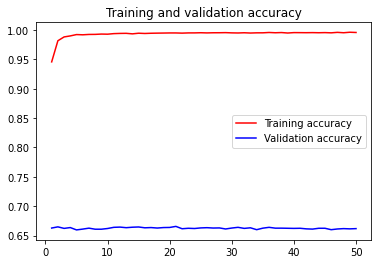

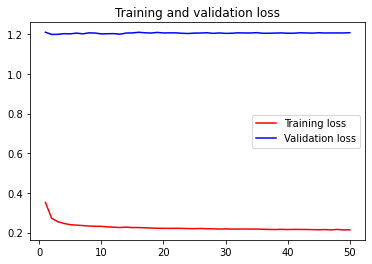

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()


Validation accuracy show average overfitting.

---
**Fast Training |  Fast Training of ResNet |  Step Decay Learning Rate  + Look Ahead Optimizer**

---

In [ ]:
!pip install tensorflow-addons
import tensorflow as tf
import tensorflow_addons as tfa

     |████████████████████████████████| 686kB 8.1MB/s 


In [ ]:
BATCH_SIZE=128
EPOCHS = 50

init_weights = model.get_weights()

opt = tf.keras.optimizers.SGD(learning_rate=0.05)
model.compile(loss='categorical_crossentropy',
             optimizer=tfa.optimizers.Lookahead(opt),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_images, val_labels), verbose=1)

Epoch 1/50
352/352 [==============================] - 19s 44ms/step - loss: 0.5236 - accuracy: 0.8898 - val_loss: 1.1251 - val_accuracy: 0.6872
Epoch 2/50
352/352 [==============================] - 15s 43ms/step - loss: 0.4194 - accuracy: 0.9175 - val_loss: 1.3151 - val_accuracy: 0.6440
Epoch 3/50
352/352 [==============================] - 15s 44ms/step - loss: 0.3916 - accuracy: 0.9222 - val_loss: 1.1116 - val_accuracy: 0.7002
Epoch 4/50
352/352 [==============================] - 15s 43ms/step - loss: 0.3873 - accuracy: 0.9235 - val_loss: 1.4101 - val_accuracy: 0.6470
Epoch 5/50
352/352 [==============================] - 15s 43ms/step - loss: 0.3747 - accuracy: 0.9257 - val_loss: 1.4918 - val_accuracy: 0.6210
Epoch 6/50
352/352 [==============================] - 15s 43ms/step - loss: 0.3583 - accuracy: 0.9323 - val_loss: 1.1614 - val_accuracy: 0.6972
Epoch 7/50
352/352 [==============================] - 15s 43ms/step - loss: 0.3412 - accuracy: 0.9373 - val_loss: 2.9664 - val_accuracy:

The ResNet Model with Step Decay Learning Rate and Look Ahead Optimize has some improvements and shows results comparable to the original ResNet. However, it is not higher than original result that might be because of the effect of Step Decay Learning Rate.

In [ ]:
# Test Accuracy/Loss
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.5075163841247559 / Test accuracy: 0.7008000016212463


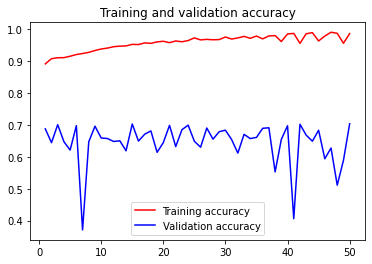

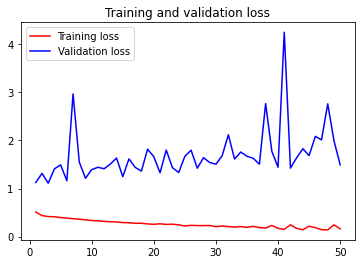

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()


---
**Fast Training |  Fast Training of ResNet |  + Look Ahead Optimizer**

---

In [ ]:
BATCH_SIZE=128
EPOCHS = 50

init_weights = model.get_weights()

opt = tf.keras.optimizers.SGD()
model.compile(loss='categorical_crossentropy',
             optimizer=tfa.optimizers.Lookahead(opt),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_images, val_labels), verbose=1)

Epoch 1/50
352/352 [==============================] - 19s 44ms/step - loss: 0.1342 - accuracy: 0.9944 - val_loss: 1.3168 - val_accuracy: 0.7308
Epoch 2/50
352/352 [==============================] - 15s 43ms/step - loss: 0.1094 - accuracy: 0.9996 - val_loss: 1.2984 - val_accuracy: 0.7344
Epoch 3/50
352/352 [==============================] - 15s 43ms/step - loss: 0.1003 - accuracy: 0.9998 - val_loss: 1.2994 - val_accuracy: 0.7322
Epoch 4/50
352/352 [==============================] - 15s 43ms/step - loss: 0.0929 - accuracy: 0.9999 - val_loss: 1.2923 - val_accuracy: 0.7336
Epoch 5/50
352/352 [==============================] - 15s 42ms/step - loss: 0.0862 - accuracy: 1.0000 - val_loss: 1.2911 - val_accuracy: 0.7350
Epoch 6/50
352/352 [==============================] - 15s 43ms/step - loss: 0.0802 - accuracy: 1.0000 - val_loss: 1.2912 - val_accuracy: 0.7358
Epoch 7/50
352/352 [==============================] - 15s 42ms/step - loss: 0.0747 - accuracy: 1.0000 - val_loss: 1.2907 - val_accuracy:

In [ ]:
# Test Accuracy/Loss
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.2409528493881226 / Test accuracy: 0.7373999953269958


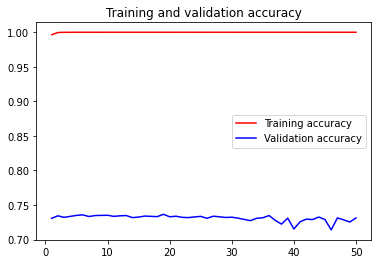

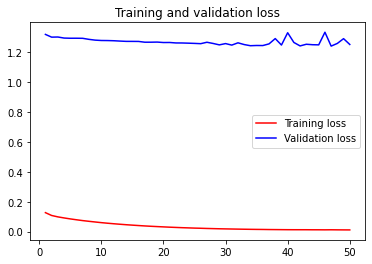

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()


### Task 2.3 Performance comparison

*(weight ~3%)*



**Part 2. Cifar-10**


|   | Train Accuracy  | Train Loss  | Val Accuracy  | Val Loss   |  Test Accuracy | Test Loss | Training Time (ms per step) |
|---|---|---|---|---|---|---|---|
| Fast Training, "Shallow" CovNet   | 0.9723  | 0.0789  |  0.6656 |  2.5531 |  0.6713 |  2.6417 | 2 
| Fast Training of ResNet  | 0.9890  | 0.0708  |  0.7800 |  1.1889 |  0.7792 |  1.1887 | 15
|  Fast Training of ResNet (prepared model ResNet50) | 0.8575  | 0.4610  |  0.6902 |  1.2436 |  0.6920 |  1.2080 | 25
|  Fast Training of ResNet,+ Step Decay Learning Rate (0.05) | 0.9986  | 0.1061  |  0.7344 |  0.9807 |  0.7371 |  0.9719 | 15
|  Fast Training of ResNet,+ Step Decay Learning Rate (0.05) + Look Ahead Optimizer | 0.9887  | 0.1592  |  0.7032 |  1.4914 |  0.7008 |  1.5075 | 15
|  Fast Training of ResNet,+ Look Ahead Optimizer | 1.0000 | 0.0113  |  0.7314 |  1.2495 |  0.7374 |  1.2410 | 15

The ResNet model with only Look Ahead Optimize and without use of Step Decay Learning Rate has the highest accuracy amongst all ResNet Models. It has 81.22% for the Test accuracy and the lowest test loss under 1. It support the statement that learning rate on Cifar-10 is not very effective and it is the same as for the Fashion Mnist in the Assignment 1.








The "Shallow" CovNet model showed the most poor performance as expected.

The original ResNet in these experiments demostrated the highest test accuracy of 78%, while Model with Step Decay Leaning Rate and Model with Look Ahead Optimizer have the second highest teast accuracy about 74%.

On itself Learning rate does not show much improvement and this is compararable the learning rate behaviour in the previous assignment.

In the future the effect of learning rate on Look Ahead Optimizer can be investigated in more details. It is possible that the way learning rate perform individually is diffrent to its performance with other optimizers. It is possible the for better results of Look Ahead Optimizer, Learning Rate should be different.

## Task 3 (**HD level task**) Research on new models
*(weight ~10%)*


Write a short report : 
---
#####**DenseNet**

#####Huang G, Liu Z, Van Der Maaten L, Weinberger KQ. Densely connected convolutional networks. In Proceedings of the IEEE conference on computer vision and pattern recognition 2017 (pp. 4700-4708).
---
**Identify the main issues that your chosen architecture aims to address. (For example, does it try to reduce the number of parameters or to speed up the training?)**

- It alleviate the vanishing-gradient problem 
- It strengthen feature propagation
- It encourage feature reuse. In particular, it yields condensed models that are easy to train and highly parameterefficient. Concatenating feature-maps learned by different layers increases variation in th
- It reduce the number of parameters to speed up training.
- It requires less computation to achieve high performance.


**What measures the architecture used to reduce the number of parameters, or reducing the training cost, or improving the model performance?**

- Requires fewer parameters since no need to relearn redundant feature-maps.

- DenseNet differentiates between information that is added to the network and that is preserved.
DenseNet layers are very narrow (e.g., 12 filters per layer), adding only a small set of feature-maps to the “collective knowledge” of the network and keep the  emaining featuremaps unchanged—and the final classifier.

- Improved flow of information and gradients makes the training easier.

- Each layer has direct access to the gradients from the
loss function and the original input signal, leading to an implicit deep supervision, this helps training.



**Different Dense connectivity pattern**
- Direct connections from any layer to all subsequent layers. The layer receives the feature-maps of all preceding layers. For ease of implementation, we concatenate the multiple inputs layers into a single tensor.

**Composite function**
- It is a three consecutive operations: batch normalization, a rectified linear unit (ReLU) and a 3 × 3 convolution (Conv).

**Pooling layers**
- The concatenation operation used in is not viable when the size of feature-maps changes. The down-sampling layers that change the size of feature-maps. For it devide the network into multiple densely connected dense blocks. The layers between blocks as transition layers, which do convolution and pooling. The transition layers consist of a batch normalization layer and an 1×1 convolutional layer followed by a 2×2 average pooling layer.

**Growth rate**
- The  DenseNet have very narrow layers, e.g., k = 12. The hyperparameter k as the growth rate of the network. Relatively small growth rate is sufficient because each layer has access
to all the preceding feature-maps in its block and, therefore,
to the network’s “collective knowledge”. 
Each layer adds k feature-maps of its own to this state. The growth
rate regulates how much new information each layer contributes to the global state. The global state: there is no need
to replicate it from layer to layer.

**Compression**
- To further improve model compactness, reduce the number of feature-maps at transition layers. If a dense block contains m feature-maps, we let
the following transition layer generate ⌊θm⌋ output featuremaps, where 0 <θ ≤1 is referred to as the compression factor. When θ = 1, the number of feature-maps across transition layers remains unchanged. We refer the DenseNet with
θ < 1 as DenseNet-C, and we set θ = 0.5 in our experiment.
When both the bottleneck and transition layers with θ < 1
are used, we refer to our model as DenseNet-BC.


**Capacity.**

- Without compression or bottleneck layers the error drops as the number of parameters increases. This suggests that DenseNets can utilize the increased representational power of bigger and deeper models. It also indicates that they do not suffer from overfitting or the optimization
difficulties of residual networks.

**Parameter Efficiency.** 

- DenseNets utilize parameters more efficiently than ResNets. The DenseNet with bottleneck structure and dimension reduction at transition layers is particularly parameter-efficient.

**Overfitting.**

- Less tendency to overfit due to the higher number of the more efficient use of parameters.


---
**Research on New Models |  DenseNet |  Import Libraries**

---

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, GlobalAveragePooling2D, Dense, concatenate, AveragePooling2D
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation, Dropout
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras.optimizers import Adam


import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)


2.4.1
2.4.0


---
**Research on New Models |  DenseNet |  Import Dataset + Preprocessing**

---

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Max value in the image set:
max = np.max(train_images)

#Normalization:
train_images = train_images.astype('float32')/max
test_images = test_images.astype('float32')/max

#Labels to cathegorical
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


print(np.min(test_images))
print(np.max(test_images))
print(train_images.shape)
print(test_images.shape)


# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state = 2)
print("train_images shape: ",train_images.shape)
print("test_images shape: ",test_images.shape)
print("val_images shape: ",val_images.shape)
print("train_labels shape: ",train_labels.shape)
print("test_lables shape: ",test_labels.shape)
print("val_labels shape :",val_labels.shape)

0.0
1.0
(50000, 32, 32, 3)
(10000, 32, 32, 3)
train_images shape:  (45000, 32, 32, 3)
test_images shape:  (10000, 32, 32, 3)
val_images shape:  (5000, 32, 32, 3)
train_labels shape:  (45000, 10)
test_lables shape:  (10000, 10)
val_labels shape : (5000, 10)


---
**Research on New Models |  DenseNet |  Define DenseNet Model (from research paper)**

---

Huang G, Liu Z, Van Der Maaten L, Weinberger KQ. Densely connected convolutional networks. In Proceedings of the IEEE conference on computer vision and pattern recognition 2017 (pp. 4700-4708). 

https://arxiv.org/pdf/1608.06993.pdf

Code Sample based on the reference paper:

https://github.com/arnavdodiedo/DenseNet-Fashion-MNIST/blob/master/fashion-mnist-net.py

In [ ]:
class DenseNet:
    def __init__(self, input_shape=None, dense_blocks=3, dense_layers=-1, growth_rate=12, nb_classes=None,
                 dropout_rate=None, bottleneck=False, compression=1.0, weight_decay=1e-4, depth=40):

        # Checks
        if nb_classes == None:
            raise Exception( 'Please define number of classes (e.g. num_classes=10). This is required for final softmax.')

        if compression <= 0.0 or compression > 1.0:
            raise Exception('Compression have to be a value between 0.0 and 1.0.')

        if type(dense_layers) is list:
            if len(dense_layers) != dense_blocks:
                raise AssertionError('Number of dense blocks have to be same length to specified layers')
        elif dense_layers == -1:
            dense_layers = int((depth - 4) / 3)
            if bottleneck:
                dense_layers = int(dense_layers / 2)
            dense_layers = [dense_layers for _ in range(dense_blocks)]
        else:
            dense_layers = [dense_layers for _ in range(dense_blocks)]

        self.dense_blocks = dense_blocks
        self.dense_layers = dense_layers
        self.input_shape = input_shape
        self.growth_rate = growth_rate
        self.weight_decay = weight_decay
        self.dropout_rate = dropout_rate
        self.bottleneck = bottleneck
        self.compression = compression
        self.nb_classes = nb_classes
        
    def build_model(self):
        img_input = Input(shape=self.input_shape, name='img_input')
        nb_channels = self.growth_rate
        
        x = Conv2D(2*self.growth_rate, (3,3), 
                   padding='same', strides = (1,1), 
                   kernel_regularizer=keras.regularizers.l2(self.weight_decay))(img_input)
        
        for block in range(self.dense_blocks-1):
            x, nb_channels = self.dense_block(x, self.dense_layers[block], nb_channels, self.growth_rate,
                                              self.dropout_rate, self.bottleneck, self.weight_decay)
            
            x = self.transition_layer(x, nb_channels, self.dropout_rate, self.compression, self.weight_decay)
            nb_channels = int(nb_channels*self.compression)
            
        x, nb_channels = self.dense_block(x, self.dense_layers[-1], nb_channels, self.growth_rate, self.dropout_rate, self.weight_decay)
        
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = GlobalAveragePooling2D()(x)
        prediction = Dense(self.nb_classes, activation='softmax')(x)
        
        return Model(inputs=img_input, outputs=prediction, name='densenet')
        
    def dense_block(self, x, nb_layers, nb_channels, growth_rate, dropout_rate=None, bottleneck=False, weight_decay=1e-4):
        for i in range(nb_layers):
            cb = self.convolution_block(x, growth_rate, dropout_rate, bottleneck)
            nb_channels += growth_rate
            x = concatenate([cb,x])
            
        return x, nb_channels
    
    def convolution_block(self, x, nb_channels, dropout_rate=None, bottleneck=False, weight_decay=1e-4):       

        # Bottleneck
        if bottleneck:
            bottleneckWidth = 4
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            x = Conv2D(nb_channels * bottleneckWidth, (1, 1),
                                     kernel_regularizer=keras.regularizers.l2(weight_decay))(x)
            # Dropout
            if dropout_rate:
                x = Dropout(dropout_rate)(x)

        # Standard (BN-ReLU-Conv)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(nb_channels, (3, 3), padding='same')(x)

        # Dropout
        if dropout_rate:
            x = Dropout(dropout_rate)(x)

        return x

    def transition_layer(self, x, nb_channels, dropout_rate=None, compression=1.0, weight_decay=1e-4):
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(int(nb_channels * compression), (1, 1), padding='same',
                                 kernel_regularizer=keras.regularizers.l2(weight_decay))(x)

        # Adding dropout
        if dropout_rate:
            x = Dropout(dropout_rate)(x)

        x = AveragePooling2D((2, 2), strides=(2, 2))(x)
        return x
    

---
**Research on New Models |  DenseNet |  Define the Model**

---

In [ ]:
densenet = DenseNet((32,32,3), nb_classes=10, depth=35)

---
**Research on New Models |  DenseNet |  Compile and Fit Model**

---

In [ ]:
BATCH_SIZE=128
EPOCHS = 50

model = densenet.build_model()
init_weights = model.get_weights()

optimizer = Adam(lr=1E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,   metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_images, val_labels), verbose=1)

model.save_weights('D:\codes\python\densenet\Fashion-MNIST\weights.h5')

Epoch 1/50
352/352 [==============================] - 72s 183ms/step - loss: 1.6629 - accuracy: 0.4439 - val_loss: 2.4728 - val_accuracy: 0.2688
Epoch 2/50
352/352 [==============================] - 61s 173ms/step - loss: 1.0401 - accuracy: 0.6622 - val_loss: 1.1576 - val_accuracy: 0.6274
Epoch 3/50
352/352 [==============================] - 61s 174ms/step - loss: 0.8373 - accuracy: 0.7364 - val_loss: 1.4358 - val_accuracy: 0.5690
Epoch 4/50
352/352 [==============================] - 61s 174ms/step - loss: 0.6859 - accuracy: 0.7886 - val_loss: 1.2512 - val_accuracy: 0.6498
Epoch 5/50
352/352 [==============================] - 61s 173ms/step - loss: 0.5991 - accuracy: 0.8178 - val_loss: 0.9897 - val_accuracy: 0.6990
Epoch 6/50
352/352 [==============================] - 61s 174ms/step - loss: 0.5156 - accuracy: 0.8487 - val_loss: 1.0822 - val_accuracy: 0.6748
Epoch 7/50
352/352 [==============================] - 61s 174ms/step - loss: 0.4667 - accuracy: 0.8650 - val_loss: 0.9333 - val_ac

**Part 3. DenseNet on Cifar-10**

The DenseNet fitting took 50 minutes. About 1 minute per epoch.

The DenseNet shows average performance with test accuracy of 83.72%

|   | Train Accuracy  | Train Loss  | Val Accuracy  | Val Loss   |  Test Accuracy | Test Loss | Training Time per epoch|
|---|---|---|---|---|---|---|---|
|  DenseNet | 0.9860  | 0.1129  |  0.8353 |  0.8240 |  0.8372 |  0.8193 | 61


---
**Research on New Models |  DenseNet |  Test Loss/Accuracy**

---

In [ ]:
# Generate generalization metrics
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.8193304538726807 / Test accuracy: 0.8371999859809875


---
**Research on New Models |  DenseNet |  Plot train/val Loss/Accuracy**

---

The validation score is slightly unstable, but overall shows moderate ovefitting.

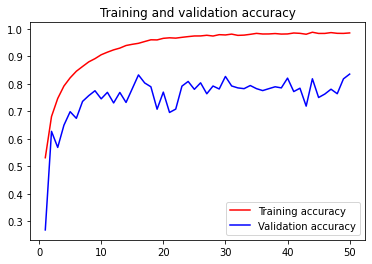

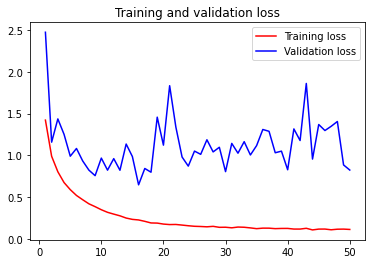

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()


---
**Research on New Models |  DenseNet |  Confusion Matrix**

---

The confusion matrix shows high percentage of correctly predicted labels and high concentration of values along the diagonal line.

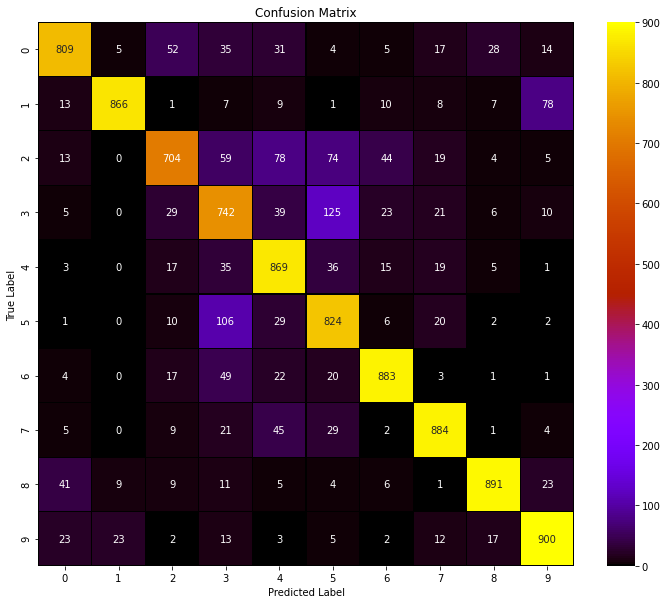

In [ ]:
import seaborn as sns

pred = model.predict(test_images)
pred_label = np.argmax(pred, axis = 1)
original_label = np.argmax(test_labels, axis = 1)
conf_matrix = confusion_matrix(original_label, pred_label) 

f,ax = plt.subplots(figsize = (12,10))
sns.heatmap(conf_matrix, annot=True, linewidths=0.1, cmap = "gnuplot", linecolor="black", fmt='.0f', ax=ax)
#ocean
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
for i in range(len(conf_matrix)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(conf_matrix[i])-conf_matrix[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(conf_matrix[i][i] / 10))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 191 out of 1000
Percentage of True Prediction: 80.90%
***********************************************************
Class: 1
Number of Wrong Prediction: 134 out of 1000
Percentage of True Prediction: 86.60%
***********************************************************
Class: 2
Number of Wrong Prediction: 296 out of 1000
Percentage of True Prediction: 70.40%
***********************************************************
Class: 3
Number of Wrong Prediction: 258 out of 1000
Percentage of True Prediction: 74.20%
***********************************************************
Class: 4
Number of Wrong Prediction: 131 out of 1000
Percentage of True Prediction: 86.90%
***********************************************************
Class: 5
Number of Wrong Prediction: 176 out of 1000
Percentage of True Prediction: 82.40%
***********************************************************
Class: 6
Number of Wrong Prediction: 117 out of 1000
Percentage of True Prediction: 88.30%
***

Class 2 has the lowest number of correctly predicted images: 70.4%. The labels with the highest number of predicted images is Class 9: 90%.
Overall, the DenseNet Model shows a good performance.

---
**END OF ASSIGNMENT TWO**